In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [2]:
DATASET_PATH = "dataset.json"

In [3]:
#Loading the dataset

with open(DATASET_PATH, "r") as fp:
    data = json.load(fp)
X = np.array(data['MFCCs'])
y = np.array(data['labels'])
print("Number of datasets: ", len(X) if len(X)==len(y) else "Number of MFCCs and labels don't match")

Number of datasets:  980


In [4]:
#Training, test, and validation data splitting

Xtr, Xt, ytr, yt = train_test_split(X, y, test_size=0.2)
Xtr, Xval, ytr, yval = train_test_split(Xtr, ytr, test_size=0.2)

Xtr = Xtr[..., np.newaxis]
Xt = Xt[..., np.newaxis]
Xval = Xval[..., np.newaxis]

input_shape = (Xtr.shape[1], Xtr.shape[2], 1)
print(input_shape)

(126, 13, 1)


In [5]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.8):
          self.model.stop_training = True

callbacks = myCallback()

In [6]:
model = tf.keras.models.Sequential([
    layers.Conv2D(64,(3,3), activation="relu", input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l1(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((3,3), strides=(2,2), padding="same"),
    layers.Conv2D(32, (3,3), activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((3,3), strides=(2,2), padding="same"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 11, 64)       640       
_________________________________________________________________
batch_normalization (BatchNo (None, 124, 11, 64)       256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 6, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 4, 32)         18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 4, 32)         128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 2, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0

In [7]:
optimiser = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimiser,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    Xtr,
    ytr,
    epochs=60,
    batch_size=32,
    validation_data=(Xval, yval),
)

Epoch 1/60
20/20 [==============================] - 1s 44ms/step - loss: 4.3338 - accuracy: 0.1053 - val_loss: 4.1934 - val_accuracy: 0.1529
Epoch 2/60
20/20 [==============================] - 1s 36ms/step - loss: 3.1072 - accuracy: 0.1866 - val_loss: 3.3968 - val_accuracy: 0.1656
Epoch 3/60
20/20 [==============================] - 1s 38ms/step - loss: 2.7941 - accuracy: 0.3158 - val_loss: 2.9942 - val_accuracy: 0.2675
Epoch 4/60
20/20 [==============================] - 1s 38ms/step - loss: 2.6008 - accuracy: 0.3844 - val_loss: 2.7724 - val_accuracy: 0.3121
Epoch 5/60
20/20 [==============================] - 1s 40ms/step - loss: 2.4519 - accuracy: 0.4290 - val_loss: 2.6057 - val_accuracy: 0.3503
Epoch 6/60
20/20 [==============================] - 1s 38ms/step - loss: 2.3439 - accuracy: 0.4705 - val_loss: 2.4838 - val_accuracy: 0.4140
Epoch 7/60
20/20 [==============================] - 1s 36ms/step - loss: 2.1932 - accuracy: 0.5263 - val_loss: 2.3821 - val_accuracy: 0.4522
Epoch 8/60
20

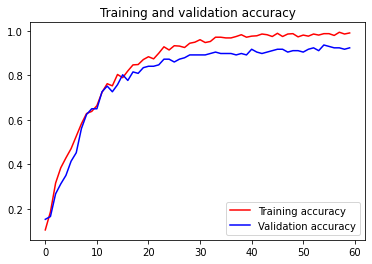

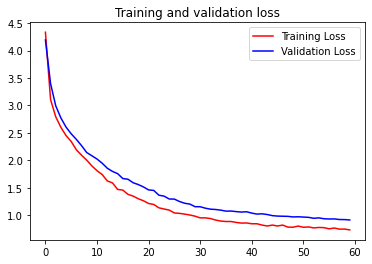

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
model.save("model.h5")